# LandiNFriends
## Checkpoint 3

- Fransiscus Emmanuel Bunaren - 1806173506
- Fauzan Nazranda Rizqan - 2006488013
- Winaldo Amadea Hestu - 2006520001
- Firlandi Althaf Rizqi Ansyari - 2006489874

## Data Integration
### including data cleaning (remove duplicate data)
Merge the data from the all the sources

In [154]:
# Load Dataset
# From data_raw directory, merge all the csv files that ends with 0
# into one csv
import os

def readfile(file):
	with open(file, 'r', encoding='utf8') as f:
		return f.read()

# Combine CSVs
new_csv = ""
header = ""
for file in os.listdir('data_raw'):
	if file.endswith('.csv'):
		tmp = readfile('data_raw/' + file).split('\n')
		header = tmp[0]
		rows = tmp[1:]
		new_csv += '\n'.join(rows) + "\n"
new_csv = [i for i in new_csv.split('\n') if i]

# Data Cleaning
# Remove Duplicates
new_csv_unique = list(set(new_csv))

# Add Header
new_csv = header + '\n' + '\n'.join(new_csv)
new_csv_unique = header + '\n' + '\n'.join(new_csv_unique)

# Save new_csv to a csv file
with open('data_merged/merged_playlist.csv', 'w+', encoding='utf8') as f:
	f.write(new_csv)
with open('data_merged/merged_playlist_unique.csv', 'w+', encoding='utf8') as f:
	f.write(new_csv_unique)

## Data Understanding 

### Data Description

In [155]:
import pandas as pd

In [156]:
df = pd.read_csv('data_merged/merged_playlist.csv') # Read CSV
total_rows, total_attributes = df.shape # Get the total of rows and attributes
print("Total Rows:", total_rows) # Print total of rows
print(df.describe()) # Get the descriptive statistics of the dataframe

Total Rows: 1270
              year          bpm         nrgy         dnce           dB  \
count  1270.000000  1270.000000  1270.000000  1270.000000  1270.000000   
mean   2004.285039   118.848031    65.719685    62.250394    -7.037795   
std      16.281624    24.911153    19.852970    14.419155     3.559268   
min    1945.000000     0.000000     0.000000     0.000000   -60.000000   
25%    1997.000000   100.000000    53.000000    53.000000    -9.000000   
50%    2012.000000   120.000000    70.000000    64.000000    -6.000000   
75%    2016.000000   130.000000    81.000000    72.000000    -5.000000   
max    2019.000000   206.000000   100.000000    97.000000    -1.000000   

              live          val          dur        acous         spch  \
count  1270.000000  1270.000000  1270.000000  1270.000000  1270.000000   
mean     17.992126    54.896850   224.322047    22.514961     7.214173   
std      13.784904    23.650854    49.253380    26.504965     6.918514   
min       0.000000  

### Exploratory Data Analysis

In [157]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

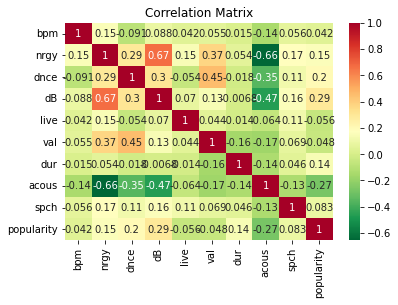

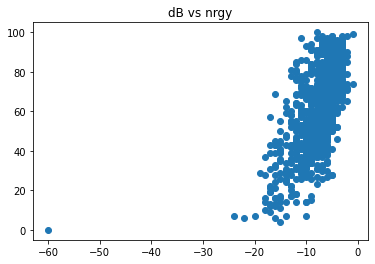

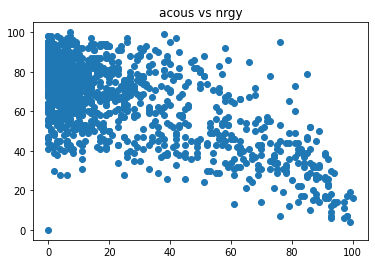

In [158]:
attributes = "title,artist,genre,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,popularity,has_win_award".split(",")
num_attr = "bpm,nrgy,dnce,dB,live,val,dur,acous,spch,popularity".split(",")
cat_attr = "genre,year,has_win_award".split(",")

df = pd.read_csv('data_merged/merged_playlist.csv')
df_unique = pd.read_csv('data_merged/merged_playlist_unique.csv')
df_num = df[num_attr]

# Create correlation matrix
corr = df_num.corr()
# Plot correlation matrix
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, cmap='RdYlGn_r',annot=True)
plt.title("Correlation Matrix")
plt.show()

# Plot scatterplot for db and nrgy
plt.scatter(df_num['dB'], df_num['nrgy'])
plt.title("dB vs nrgy")
plt.show()

# Plot scatterplot for acous and nrgy
plt.scatter(df_num['acous'], df_num['nrgy'])
plt.title("acous vs nrgy")
plt.show()

In [159]:
# Analyze Genre
df_genre = df['genre']
print("Number of genres: ", df_genre.nunique())
print("Number of missing values:",df_genre.isnull().sum())
top_10_genre = df_genre.value_counts().head(10)
print("Top 10 Genre")
print("==========================")
print(top_10_genre)
plt.show("\n")

# Analyze Artist
df_artist = df_unique['artist']
print("Number of artist: ", df_artist.nunique())
print("Number of missing values:",df_artist.isnull().sum())
top_10_artist = df_artist.value_counts().head(10)
print("Top 10 Artist")
print("==========================")
print(top_10_artist)
print("\n")

# Most popular genre for each year
genre_year = dict()
df_year_genre = df_unique[['year','genre']]
for year in df['year'].unique():
	# Get all genre with specific year and sort descending
	tmp_df_year = df_year_genre[df['year'] == year].value_counts().sort_values(ascending=False)
	genre_year[year] = tmp_df_year.index[0][1]
print("Most common genre (per year)")
print("==========================")
# Sort descending and print
for year in sorted(genre_year.keys(), reverse=True):
	print(year, genre_year[year])
print("\n")

Number of genres:  136
Number of missing values: 16
Top 10 Genre
dance pop             441
adult standards        93
album rock             77
pop                    71
canadian pop           43
boy band               30
glam rock              23
big room               23
barbadian pop          22
brill building pop     20
Name: genre, dtype: int64
Number of artist:  589
Number of missing values: 0
Top 10 Artist
Rihanna             21
Katy Perry          20
Justin Bieber       18
Maroon 5            16
Shawn Mendes        15
Bruno Mars          15
Pitbull             14
Lady Gaga           14
David Guetta        13
The Chainsmokers    13
Name: artist, dtype: int64


Most common genre (per year)
2019 dance pop
2018 dance pop
2017 dance pop
2016 dance pop
2015 dance pop
2014 dance pop
2013 dance pop
2012 dance pop
2011 dance pop
2010 dance pop
2009 adult standards
2008 dance pop
2007 dance pop
2006 dance pop
2005 dance pop
2004 baroque pop
2003 dance pop
2002 dance pop
2001 adult standar

C:\Users\Lenovo\AppData\Local\Temp/ipykernel_11592/2287106446.py:26: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  tmp_df_year = df_year_genre[df['year'] == year].value_counts().sort_values(ascending=False)


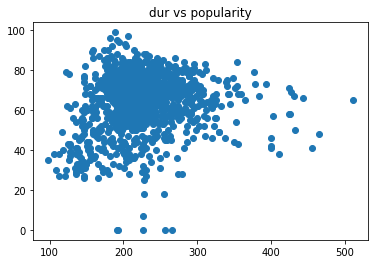

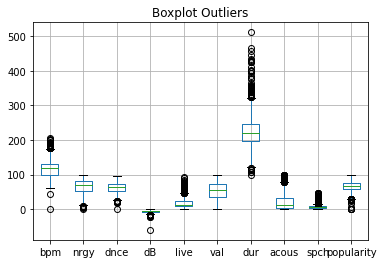

In [160]:
# Analyze correlation between duration and popularity
plt.scatter(df_num['dur'], df_num['popularity'])
plt.title("dur vs popularity")
plt.show()

# Create box plot for numeric attributes
# Also show the attribute name in the plot
df_num.boxplot(column=num_attr)
plt.title("Boxplot Outliers")
plt.show()

### Data Verifying 

In [161]:
print("Count missing values for the dataset \n",df.isnull().sum(),sep="")
duplicateSong = df.duplicated(subset='title', keep='first').sum()
print("Count duplicate song for the dataset\n", duplicateSong,sep="")

Count missing values for the dataset 
title             0
artist            0
genre            16
year              0
bpm               0
nrgy              0
dnce              0
dB                0
live              0
val               0
dur               0
acous             0
spch              0
popularity        0
has_win_award     0
dtype: int64
Count duplicate song for the dataset
78


## Data Preparation

#### Data Imputation

In [162]:
#Shows number of missing values for genre
print("Missing Values Before: " + str(df_unique['genre'].isnull().sum()))
#Shows the number for each genre
print(df_unique['genre'].value_counts().sort_values(ascending=False))
#Replaces missing value with mode
df_unique['genre'].fillna(df_unique['genre'].mode()[0], inplace=True)
print("==========================")
#Shows number of missing values for genre after imputation
print("Missing Values After: " + str(df_unique['genre'].isnull().sum()))
#Shows the number for each genre after imputation
print(df_unique['genre'].value_counts().sort_values(ascending=False))


Missing Values Before: 16
dance pop           440
adult standards      90
album rock           77
pop                  71
canadian pop         43
                   ... 
belgian dance         1
beach music           1
country rap           1
cowboy western        1
french indie pop      1
Name: genre, Length: 136, dtype: int64
Missing Values After: 0
dance pop           456
adult standards      90
album rock           77
pop                  71
canadian pop         43
                   ... 
belgian dance         1
beach music           1
country rap           1
cowboy western        1
french indie pop      1
Name: genre, Length: 136, dtype: int64


#### One Hot Encoding

In [186]:
import pandas as pd


df = pd.read_csv(r'data_merged\cleandata.csv', index_col=0)
# get the genre column
genre = df['genre']
# get the unique genre
unique_genre = genre.unique()
print(unique_genre) # list the unique genres
# get the number of unique genres
num_unique_genre = len(unique_genre)
print(num_unique_genre) # print the number of unique genres

# one hot encoding for genres
df = pd.get_dummies(df, columns=['genre'])
print(df)

['adult standards' 'brill building pop' 'doo-wop' 'deep adult standards'
 'british comedy' 'dance pop' 'classic soul' 'louisiana blues'
 'british dance band' 'merseybeat' 'yodeling' 'classic uk pop'
 'british invasion' 'album rock' 'baroque pop' 'blues rock' 'art rock'
 'rock-and-roll' 'chanson' 'australian rock' 'classic rock'
 'canadian folk' 'alternative country' 'acoustic blues' 'art pop'
 'classic girl group' 'bubblegum pop' 'blues' 'american folk revival'
 'bebop' 'beach music' 'appalachian folk' 'cowboy western' 'drone folk'
 'british folk' 'boogaloo' 'avant-garde jazz' 'afropop' 'british blues'
 'afrobeat' 'australian talent show' 'glam rock' 'europop' 'hollywood'
 'soft rock' 'pop' 'disco' 'country' 'dance rock' 'classic country pop'
 'chicago soul' 'brit funk' 'country rock' 'native american' 'glam metal'
 'new wave pop' 'mellow gold' 'hi-nrg' 'glam punk' 'bow pop' 'eurodance'
 'alternative rock' 'classic danish pop' 'jazz fusion' 'bronx hip hop'
 'british soul' 'atl hip hop'

#### Data Selection

In [175]:
from sklearn.cluster import KMeans
from collections import Counter

# Load the final dataset
df_final_real = pd.read_csv('data_merged/final_dataset.csv')

# Select some columns
removed_column = {"title","artist","year"}
df_final = df_final_real[[i for i in df_final_real.columns if i not in removed_column]]

#### Data Normalization/Scaling

In [188]:
# Using MinMaxScaler for numeric attributes
from sklearn.preprocessing import MinMaxScaler

min_max_scaler = MinMaxScaler()
df_final = min_max_scaler.fit_transform(df_final)

In [189]:
display(df_final)

array([[0.00000000e+00, 5.63106796e-01, 3.40000000e-01, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [7.88022065e-04, 8.59223301e-01, 3.40000000e-01, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.57604413e-03, 3.93203883e-01, 4.90000000e-01, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       ...,
       [9.98423956e-01, 6.60194175e-01, 7.60000000e-01, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [9.99211978e-01, 5.53398058e-01, 7.90000000e-01, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.00000000e+00, 7.28155340e-01, 4.40000000e-01, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00]])

# Modeling

#### K-Means Clustering

In [190]:
K = range(1,11)
for k in K:
	kmeans = KMeans(n_clusters=k,init='k-means++',n_init=10,random_state=0)
	kmeans_result = kmeans.fit(df_final)
	print(k,"Clusters =",Counter(kmeans_result.labels_))

1 Clusters = Counter({0: 1265})
2 Clusters = Counter({1: 809, 0: 456})
3 Clusters = Counter({0: 607, 1: 454, 2: 204})
4 Clusters = Counter({0: 527, 1: 424, 3: 185, 2: 129})
5 Clusters = Counter({0: 426, 1: 361, 2: 259, 4: 129, 3: 90})
6 Clusters = Counter({0: 422, 4: 409, 5: 140, 3: 127, 2: 90, 1: 77})
7 Clusters = Counter({3: 426, 6: 297, 0: 194, 1: 127, 2: 90, 4: 77, 5: 54})
8 Clusters = Counter({1: 422, 7: 210, 6: 173, 3: 112, 0: 110, 5: 90, 4: 77, 2: 71})
9 Clusters = Counter({6: 339, 3: 210, 5: 173, 4: 110, 7: 108, 8: 90, 0: 87, 1: 77, 2: 71})
10 Clusters = Counter({0: 268, 8: 185, 5: 185, 7: 171, 4: 106, 9: 90, 1: 77, 2: 71, 6: 69, 3: 43})


#### Testing the recommendation system
- This part will only test whether the recommendation system can provide a music recommendation for the user.
- From the whole dataset, we will use 10 data points for testing.

In [191]:
# Euclidean Distance
def euclidean(a,b):
	dist = 0
	if len(a) != len(b):
		raise Exception('Different vector size')
	for i in range(len(a)):
		dist += (a[i] - b[i]) ** 2
	dist **= 1/2
	return dist

In [198]:
import numpy as np
# Take 10 data points
test_indices = np.random.choice(df_final.shape[0], 10, replace=False)
df_final_test = df_final[test_indices]
# The the rest of the data
df_final_train = np.delete(df_final, test_indices, axis=0)

# Train K-Means
kmeans = KMeans(n_clusters=17,init='k-means++',n_init=10,random_state=0)
kmeans_result = kmeans.fit(df_final_train)
cluster_train = kmeans_result.labels_

# Get Cluster Assignments
cluster_assignments = kmeans_result.predict(df_final_test)

id_cluster = list(zip(test_indices, cluster_assignments))

recommendation = dict()

for i in id_cluster:
	music_title = df_final_real.iloc[i[0]]['title']
	music_artist = df_final_real.iloc[i[0]]['artist']
	
	# Using K-NN (1-NN) get the recommended music
	# Get music (id) that are from the same cluster_id
	same_cluster_id = [v for v,k in enumerate(cluster_assignments) if k == i[1]]
	
	# Find closest distance
	closest = float("INF")
	closest_id = None
	for _ in same_cluster_id:
		dist = euclidean(df_final_test[_], df_final_train[_])
		if dist < closest:
			closest = dist
			closest_id = _

	# Get the recommended music
	recommended_music_title = df_final_real.iloc[closest_id]['title']
	recommended_music_artist = df_final_real.iloc[closest_id]['artist']

	# Print the recommended music
	print("Title: {} ({}) | Cluster_ID: {}".format(music_title, music_artist, i[1]))
	print("Recommended Music: {} ({})".format(recommended_music_title, recommended_music_artist))
	print("Eucliden Distance: {}".format(round(closest,2)))
	print("\n")

	# Add to the dictionary
	# Dictionary is only used to get unique music recommendation
	# It is because two different music can have the same music recommendation
	recommendation[recommended_music_title] = {}
	recommendation[recommended_music_title]['music'] = (music_title, music_artist, i[1])
	recommendation[recommended_music_title]['recommended'] = (recommended_music_title, recommended_music_artist)
	recommendation[recommended_music_title]['distance'] = closest

# Print the unique recommendations
''' for i in recommendation:
	print("Title: {} ({})  <Cluster_ID: {}>".format(recommendation[i]['music'][0], recommendation[i]['music'][1], recommendation[i]['music'][2]))
	print("Recommended Music: {} ({})".format(recommendation[i]['recommended'][0], recommendation[i]['recommended'][1]))
	print("Distance: {}".format(round(recommendation[i]['distance'], 2)))
	print("\n") '''

Title: Runnin' (Lose It All) (Naughty Boy) | Cluster_ID: 16
Recommended Music: Travelin' Man - Remastered (Ricky Nelson)
Eucliden Distance: 1.92


Title: Don't Stop Me Now - 2011 Mix (Queen) | Cluster_ID: 11
Recommended Music: Whatever Will Be Will Be (Que Sera Sera) (with Frank DeVol & His Orchestra) - Single Version (Doris Day)
Eucliden Distance: 2.05


Title: Let Your Love Flow (The Bellamy Brothers) | Cluster_ID: 14
Recommended Music: Everybody Loves Somebody (Dean Martin)
Eucliden Distance: 1.78


Title: Never Forget You (Zara Larsson) | Cluster_ID: 7
Recommended Music: Take Good Care Of My Baby - 1990 Remastered (Bobby Vee)
Eucliden Distance: 1.78


Title: What's My Name? (Rihanna) | Cluster_ID: 8
Recommended Music: A Teenager In Love (Dion & The Belmonts)
Eucliden Distance: 1.68


Title: 1+1 (Beyoncé) | Cluster_ID: 3
Recommended Music: She's Got You - Single Version (Patsy Cline)
Eucliden Distance: 1.8


Title: Dear Future Husband (Meghan Trainor) | Cluster_ID: 15
Recommended Mu

' for i in recommendation:\n\tprint("Title: {} ({})  <Cluster_ID: {}>".format(recommendation[i][\'music\'][0], recommendation[i][\'music\'][1], recommendation[i][\'music\'][2]))\n\tprint("Recommended Music: {} ({})".format(recommendation[i][\'recommended\'][0], recommendation[i][\'recommended\'][1]))\n\tprint("Distance: {}".format(round(recommendation[i][\'distance\'], 2)))\n\tprint("\n") '

#### Elbow Method

In [199]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from yellowbrick.cluster import SilhouetteVisualizer
from yellowbrick.cluster import KElbowVisualizer

range_n_clusters = range(2,21)
for num_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=num_clusters, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(df)
    
# Elbow method visualization
visualizer = KElbowVisualizer(kmeans, k=range_n_clusters)
visualizer.fit(df)
visualizer.show()

ModuleNotFoundError: No module named 'yellowbrick'